In [ ]:
#mengimport pandas untuk membaca file dataset yang dibutuhkan
import pandas as pd
#Membaca file menggunakan pandas data frame
df = pd.read_csv('/content/data.csv')

In [ ]:
#melihat missing value yang ada

df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [ ]:
#membaca type data yang ada pada atribut dataset yang digunakan
df.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

# **Preprosessing - Time Processing**

In [ ]:
datetime = pd.to_datetime(df['YearBuilt']) #menyimpan kolom bertipe object
datetime.dt.year

0        1970
1        1970
2        1970
3        1970
4        1970
         ... 
49995    1970
49996    1970
49997    1970
49998    1970
49999    1970
Name: YearBuilt, Length: 50000, dtype: int32

In [ ]:
# df['YearBuilt'] = pd.to_datetime(df['YearBuilt'])
# df['YearBuilt'] = df['YearBuilt'].dt.year

# df[['YearBuilt']].head()

In [ ]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


# **label encoder**

In [ ]:
object_columns_tr = df.select_dtypes(include='object').columns.tolist() #menyimpan kolom bertipe object

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
for kolom in object_columns_tr:
  df[kolom] = label_encoder.fit_transform(df[kolom])

In [ ]:
import numpy as np
numeric_tr = df.select_dtypes(include=np.number)

In [ ]:
numeric_tr

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,0,1975,100080.865895
49996,2854,2,2,1,1988,374507.656727
49997,2979,5,3,1,1962,384110.555590
49998,2596,5,2,0,1984,380512.685957


In [ ]:
numeric_tr.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood      int64
YearBuilt         int64
Price           float64
dtype: object

In [ ]:
import numpy as np
numeric_tr = df.select_dtypes(include=np.number)
numeric_tr.drop(['YearBuilt'], axis = 1,inplace =True)
numeric_columns_tr = numeric_tr.columns
scaler = StandardScaler()
df[numeric_columns_tr] = scaler.fit_transform(df[numeric_columns_tr])

In [ ]:
#Memilih feature/ciri yang digunakan, disini saya menggunakan semua data kolom kecuali kolom Species sebagai kolom label, dan Kolom Id
X = df.drop(['Bedrooms','Price'], axis=1)
#memilih kolom Species untuk digunakan sebagai label
Y = df['Price']

In [ ]:
# tampil nama fitur dan target dataset
print("feature names :", X)
print("Target names :", Y)

feature names :        SquareFeet  Bathrooms  Neighborhood  YearBuilt
0        0.207861  -1.220113     -1.223957       1969
1        0.786480   0.005614     -1.223957       1980
2       -0.254340  -1.220113      0.001790       1970
3        0.499777  -1.220113      1.227536       1996
4        0.214811   0.005614      0.001790       2001
...           ...        ...           ...        ...
49995   -1.258671   1.231341     -1.223957       1975
49996    1.472831   0.005614      0.001790       1988
49997    1.690031   1.231341      0.001790       1962
49998    1.024531   0.005614     -1.223957       1984
49999   -0.754768   1.231341     -1.223957       2011

[50000 rows x 4 columns]
Target names : 0       -0.124401
1       -0.391551
2        1.077785
3       -0.236936
4        0.625272
           ...   
49995   -1.638359
49996    1.965829
49997    2.091949
49998    2.044696
49999   -0.042142
Name: Price, Length: 50000, dtype: float64


In [ ]:
#Mengimport library yang dibutuhkan untuk melakukan split data
from sklearn.model_selection import train_test_split
# Split data yang digunakan menjadi data training dan test dengan ukuran data test 20% dari keseluruhan data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

In [ ]:
X.isnull().sum()

SquareFeet      0
Bathrooms       0
Neighborhood    0
YearBuilt       0
dtype: int64

In [ ]:
X_train.head()

,SquareFeet,Bathrooms,Neighborhood,YearBuilt
8738,0.640522,0.005614,-1.223957,1996
44880,-1.618354,-1.220113,-1.223957,2003
3478,0.522366,1.231341,1.227536,1985
4546,1.193078,1.231341,-1.223957,1981
1571,-0.700903,-1.220113,1.227536,1960


In [ ]:
y_train.head()

8738     0.408810
44880   -0.931338
3478     0.607197
4546     0.652223
1571     0.500224
Name: Price, dtype: float64

In [ ]:
# tampilkan data fitur latih dan uji
print(X_train.shape)
print(X_test.shape)

(30000, 4)
(20000, 4)


# **SIMPLE** **LINEAR** **REGRESSION**

In [ ]:
# Menghitung rata-rata dari X
X_train_mean = X_train.mean()

# Menghitung rata-rata dari y
y_train_mean = y_train.mean()

print("Rata-rata X_train:", X_train_mean)
print("Rata-rata y_train:", y_train_mean)

Rata-rata X_train: SquareFeet        -0.006242
Bathrooms          0.001201
Neighborhood      -0.003971
YearBuilt       1985.318500
dtype: float64
Rata-rata y_train: -0.007171985347522434


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [ ]:
# Inisialisasi dan latih model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

In [ ]:
X_test.dtypes

SquareFeet      float64
Bathrooms       float64
Neighborhood    float64
YearBuilt         int64
dtype: object

In [ ]:
y_test.shape

(20000,)

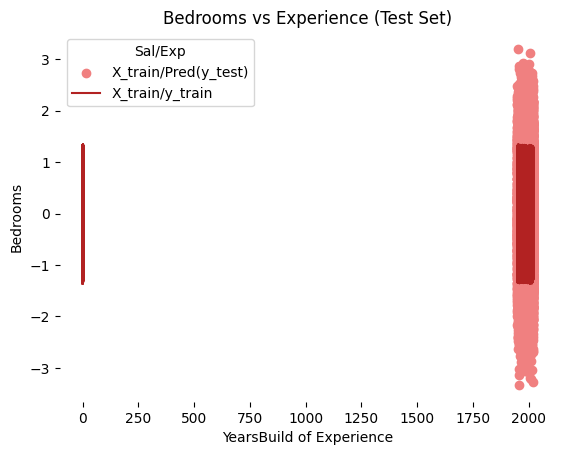

In [ ]:
# Prediction on test set
plt.scatter(X_test['YearBuilt'], y_test, color = 'lightcoral')
plt.plot(X_test, y_pred, color = 'firebrick')
plt.title('Bedrooms vs Experience (Test Set)')
plt.xlabel('YearsBuild of Experience')
plt.ylabel('Bedrooms')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [ ]:
# Regressor coefficients and intercept
print(f'Coefficient: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficient: [ 7.50868619e-01  3.30977753e-02  6.06099514e-03 -1.84964501e-04]
Intercept: 0.36471242915250607


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil akurasi
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score (R2):", r2)

Mean Absolute Error (MAE): 0.5250579070912598
Mean Squared Error (MSE): 0.4307508954874892
Root Mean Squared Error (RMSE): 0.6563161551321811
R2 Score (R2): 0.5670415583834385
